<a href="https://colab.research.google.com/github/PerarasanV/Creditwise-Predictor/blob/main/Creditwise_Predictor_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project proposal - Credit card approval  -Perarasan.V(S4513)

Credit card plays a major role in the Banking sector, It is one of the hottest department under any banks as it serves a significant source of revenue through interest charges and fees, Also it helps banks to build customer relationship as credit cards provide several discounts, gift vouchers and help them build their credit score. Since credit card benifits both customers and banks it is important that banks must take a great care while issuing these cards.Lot of parameters about the individual needs to analyzed before its been given to them.A Machine learning model can be of great deal in the case of predicting the right person for getting a credit card. An effective Machine Learning model that could classify the eligible person for credit card will be a game changer in the Banking sector as it will reduce the screening time drastically. This will help the banks to identify the persons who are eligible in a much faster and hastle free way which in turn make them more focused on customer satisfaction and other important factors that could help them grow their business. A Machine learning model will make use of multiple factors about an
individual to make the classification So, those additional information that the banks has been collecting about the individuals can be put to use here. In addition to the existing features given in the dataset Loan status (whether the person have taken a loan or not) and Credit score about the person would have added more advantage for the model prediction.

Initial Hypothesis:

1. work phone, phone and email id wont make much contribution to the prediction so these features can be removed.
2. Family size or children will be enough for training the model.
3. Logistic regresion, Decision tree, Random forest and Support vector machines could be a good choice for this problem statement as it is a Binary Classification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import copy
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

In [ ]:
CC_df=pd.read_csv('/content/Credit_card.csv')

In [ ]:
CC_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [ ]:
CC_df.shape

(1548, 18)

In [ ]:
CC_df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [ ]:
CC_label=pd.read_csv('/content/Credit_card_label.csv')

In [ ]:
CC_label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [ ]:
CC_merged=pd.merge(CC_df,CC_label,on='Ind_ID',how='inner')

In [ ]:
CC_merged

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


DATA ANALYSIS

In [ ]:
CC_merged.GENDER.isnull().sum()     #mode #Labelmapping

7

In [ ]:
CC_merged.GENDER.value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [ ]:
CC_merged.Car_Owner.isnull().sum()

0

In [ ]:
CC_merged.Car_Owner.value_counts()      #LabelMapping

N    924
Y    624
Name: Car_Owner, dtype: int64

In [ ]:
CC_merged.Propert_Owner.isnull().sum()

0

In [ ]:
CC_merged.Propert_Owner.value_counts()        #LabelMapping

Y    1010
N     538
Name: Propert_Owner, dtype: int64

In [ ]:
CC_merged.CHILDREN.isnull().sum()

0

In [ ]:
CC_merged.CHILDREN.value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

In [ ]:
CC_merged.Annual_income.isnull().sum()      #Mean

23

In [ ]:
CC_merged.Type_Income.isnull().sum()

0

In [ ]:
CC_merged.Type_Income.value_counts()    #Labelmapping

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [ ]:
CC_merged.EDUCATION.isnull().sum()

0

In [ ]:
CC_merged.EDUCATION.value_counts()          #LabelMapping

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [ ]:
CC_merged.Marital_status.isnull().sum()

0

In [ ]:
CC_merged.Marital_status.value_counts()  #LabelMapping

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [ ]:
CC_merged.Housing_type.isnull().sum()

0

In [ ]:
CC_merged.Housing_type.value_counts()    #Labelmapping

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [ ]:
CC_merged.Birthday_count.isnull().sum()      #Mean

22

In [ ]:
CC_merged.Employed_days.isnull().sum()

0

In [ ]:
CC_merged.Mobile_phone.isnull().sum()

0

In [ ]:
CC_merged.Work_Phone.isnull().sum()

0

In [ ]:
CC_merged.Phone.isnull().sum()

0

In [ ]:
CC_merged.EMAIL_ID.isnull().sum()

0

In [ ]:
CC_merged.Type_Occupation.isnull().sum()      #Should be predicted using model

488

In [ ]:
CC_merged.Type_Occupation.value_counts()   #Labelmapping

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [ ]:
CC_merged.Family_Members.isnull().sum()

0

In [ ]:
CC_merged.label.isnull().sum()

0

In [ ]:
CC_merged.label.value_counts()  #Target class imbalance ------should use SMOTE to resolve this issue

0    1373
1     175
Name: label, dtype: int64

In [ ]:
CC_copy=copy.deepcopy(CC_merged)

1.GENDER

In [ ]:
CC_copy.GENDER.mode()        #Mode

0    F
Name: GENDER, dtype: object

In [ ]:
CC_copy.GENDER.fillna(value='F',inplace=True)     #Filled null values with mode.

In [ ]:
CC_copy.GENDER.value_counts()

F    980
M    568
Name: GENDER, dtype: int64

In [ ]:
CC_copy.GENDER.isnull().sum()

0

In [ ]:
CC_copy.GENDER.replace(['F','M'],[0,1],inplace=True)    #LabelMapping

In [ ]:
CC_copy.GENDER.value_counts()

0    980
1    568
Name: GENDER, dtype: int64

2.Car Owner

In [ ]:
CC_copy.Car_Owner.isnull().sum()

0

In [ ]:
CC_copy.Car_Owner.value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

In [ ]:
CC_copy.Car_Owner.replace(['N','Y'],[0,1],inplace=True)   #LabelMapping

In [ ]:
CC_copy.Car_Owner.value_counts()

0    924
1    624
Name: Car_Owner, dtype: int64

3.Property Owner

In [ ]:
CC_copy.Propert_Owner.isnull().sum()

0

In [ ]:
CC_copy.Propert_Owner.value_counts()

Y    1010
N     538
Name: Propert_Owner, dtype: int64

In [ ]:
CC_copy.Propert_Owner.replace(['N','Y'],[0,1],inplace=True)   #LabelMapping

In [ ]:
CC_copy.Propert_Owner.value_counts()

1    1010
0     538
Name: Propert_Owner, dtype: int64

4.CHILDREN

In [ ]:
CC_copy.CHILDREN.isnull().sum()

0

In [ ]:
CC_copy.CHILDREN.value_counts()          #2 outliers should be removed

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

5.Annual Income

In [ ]:
CC_copy.Annual_income.isnull().sum()

23

In [ ]:
fig=px.box(CC_copy,x='Annual_income')
fig.show()                                           #Outliers

Capping the outliers

In [ ]:
UB=360000

In [ ]:
CC_copy['Annual_income']=np.where(CC_copy.Annual_income>UB,UB,CC_copy.Annual_income)

In [ ]:
fig=px.box(CC_copy,x='Annual_income')
fig.show()

In [ ]:
mean=CC_copy.Annual_income.mean()

In [ ]:
CC_copy.Annual_income.fillna(mean,inplace=True)   #Filled missing values with mean

In [ ]:
CC_copy.Annual_income.isnull().sum()

0

Standardization - Scaling

In [ ]:
scaler= StandardScaler()

In [ ]:
scaled_features= scaler.fit_transform(CC_copy[['Annual_income']])

In [ ]:
scaled_features

array([[-0.04329919],
       [ 1.64389048],
       [ 1.64389048],
       ...,
       [-0.04329919],
       [ 1.08149393],
       [ 0.51909737]])

In [ ]:
CC_copy['Annual_income']=scaled_features

In [ ]:
CC_copy

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,-4.329919e-02,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,0,1,0,0,1.643890e+00,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,0,1,0,0,1.643890e+00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,0,1,0,0,3.637310e-16,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,0,1,0,0,1.643890e+00,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,3.637310e-16,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,0,0,0,0,5.190974e-01,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,1,1,1,2,-4.329919e-02,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,1,1,0,0,1.081494e+00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [ ]:
fig=px.box(CC_copy,x='Annual_income')
fig.show()

In [ ]:
fig=px.histogram(CC_copy,x='Annual_income')
fig.show()

Transformation- Yeo Johnson transformation

In [ ]:
scaler= PowerTransformer(method="yeo-johnson")
scaled=scaler.fit_transform(CC_copy[['Annual_income']])         #I have used Yeo-Johnson method as it could handle both positive and negative values unlike box-cox and log transformation.

In [ ]:
CC_copy['Annual_income']= scaled

In [ ]:
fig=px.histogram(CC_copy,x='Annual_income')
fig.show()

6.Type Income

In [ ]:
CC_copy.Type_Income.isnull().sum()

0

In [ ]:
CC_copy.Type_Income.value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [ ]:
CC_copy.Type_Income.replace(['Working','Pensioner','Commercial associate','State servant'],[2,1,3,4],inplace=True)

In [ ]:
CC_copy.Type_Income.value_counts()

2    798
3    365
1    269
4    116
Name: Type_Income, dtype: int64

7.EDUCATION

In [ ]:
CC_copy.EDUCATION.isnull().sum()

0

In [ ]:
CC_copy.EDUCATION.value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [ ]:
CC_copy.EDUCATION.replace(['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'],[1,2,3,4,5],inplace=True)    #I have arranged them in specfic order so that the higher order category gets higher weight.

In [ ]:
CC_copy.EDUCATION.value_counts()

2    1031
4     426
3      68
1      21
5       2
Name: EDUCATION, dtype: int64

8.Marital status

In [ ]:
CC_copy.Marital_status.isnull().sum()

0

In [ ]:
CC_copy.Marital_status.value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [ ]:
CC_copy.Marital_status.replace(['Single / not married','Separated','Married','Civil marriage','Widow'],[5,4,3,2,1],inplace=True)  #I have arranged them in specfic order so that the higher order category gets higher weight.

In [ ]:
CC_copy.Marital_status.value_counts()

3    1049
5     227
2     101
4      96
1      75
Name: Marital_status, dtype: int64

9.Housing Type

In [ ]:
CC_copy.Housing_type.isnull().sum()

0

In [ ]:
CC_copy.Housing_type.value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [ ]:
CC_copy.Housing_type.replace(['Co-op apartment','Office apartment','Rented apartment','With parents','Municipal apartment','House / apartment'],[1,2,3,4,5,6],inplace=True)   #I have arranged them in specfic order so that the higher order category gets higher weight.

In [ ]:
CC_copy.Housing_type.value_counts()

6    1380
4      80
5      53
3      21
2       9
1       5
Name: Housing_type, dtype: int64

10.Birthday Count

In [ ]:
CC_copy.Birthday_count.isnull().sum()

22

In [ ]:
CC_copy['Birthday_count']=CC_copy['Birthday_count']*(-1)            #Converting to positive values

In [ ]:
CC_copy['Birthday_count'].mean()                                     #Mean

16040.342070773264

In [ ]:
CC_copy.Birthday_count.fillna(16040.342,inplace=True)              #Filled with mean

In [ ]:
CC_copy['Birthday_count']=CC_copy['Birthday_count']/(365)        #Converting days to years

In [ ]:
CC_copy

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,0.145332,1,4,3,6,51.430137,365243,1,0,0,0,NaN,2,1
1,5009744,0,1,0,0,1.479208,3,4,3,6,37.142466,-586,1,1,1,0,NaN,2,1
2,5009746,0,1,0,0,1.479208,3,4,3,6,43.946142,-586,1,1,1,0,NaN,2,1
3,5009749,0,1,0,0,0.191214,3,4,3,6,37.142466,-586,1,1,1,0,NaN,2,1
4,5009752,0,1,0,0,1.479208,3,4,3,6,37.142466,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,0.191214,3,4,3,6,32.758904,-2182,1,0,0,0,Managers,2,0
1544,5023655,0,0,0,0,0.674749,3,3,5,6,28.024658,-1209,1,0,0,0,Accountants,1,0
1545,5115992,1,1,1,2,0.145332,2,4,3,6,36.093151,-2477,1,0,0,0,Managers,4,0
1546,5118219,1,1,0,0,1.106444,2,2,2,6,41.895890,-645,1,1,1,0,Drivers,2,0


In [ ]:
CC_copy.Birthday_count.isnull().sum()

0

In [ ]:
fig=px.box(CC_copy,x='Birthday_count')
fig.show()

Standardization - Scaling

In [ ]:
scaler= StandardScaler()

In [ ]:
scaled= scaler.fit_transform(CC_copy[['Birthday_count']])

In [ ]:
scaled

array([[ 6.50710047e-01],
       [-5.91558561e-01],
       [-1.66193486e-08],
       ...,
       [-6.82793245e-01],
       [-1.78263061e-01],
       [ 1.33554697e-01]])

In [ ]:
CC_copy['Birthday_count']= scaled

In [ ]:
CC_copy

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,0.145332,1,4,3,6,6.507100e-01,365243,1,0,0,0,NaN,2,1
1,5009744,0,1,0,0,1.479208,3,4,3,6,-5.915586e-01,-586,1,1,1,0,NaN,2,1
2,5009746,0,1,0,0,1.479208,3,4,3,6,-1.661935e-08,-586,1,1,1,0,NaN,2,1
3,5009749,0,1,0,0,0.191214,3,4,3,6,-5.915586e-01,-586,1,1,1,0,NaN,2,1
4,5009752,0,1,0,0,1.479208,3,4,3,6,-5.915586e-01,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,0.191214,3,4,3,6,-9.726956e-01,-2182,1,0,0,0,Managers,2,0
1544,5023655,0,0,0,0,0.674749,3,3,5,6,-1.384324e+00,-1209,1,0,0,0,Accountants,1,0
1545,5115992,1,1,1,2,0.145332,2,4,3,6,-6.827932e-01,-2477,1,0,0,0,Managers,4,0
1546,5118219,1,1,0,0,1.106444,2,2,2,6,-1.782631e-01,-645,1,1,1,0,Drivers,2,0


In [ ]:
fig=px.box(CC_copy,x='Birthday_count')
fig.show()

In [ ]:
fig=px.histogram(CC_copy,x='Birthday_count')
fig.show()

Transformation - Yeo Johnson Transformation

In [ ]:
scaler= PowerTransformer(method="yeo-johnson")
scaled=scaler.fit_transform(CC_copy[['Birthday_count']])

In [ ]:
CC_copy['Birthday_count']= scaled

In [ ]:
fig=px.histogram(CC_copy,x='Birthday_count')
fig.show()

11. Employed_days

In [ ]:
CC_copy.Employed_days.value_counts()

 365243    261
-586         6
-622         5
-460         5
-1678        5
          ... 
-3034        1
-1324        1
-3112        1
-2959        1
-2859        1
Name: Employed_days, Length: 956, dtype: int64

In [ ]:
other_261=np.random.choice(range(1,270),size=261,replace=False)
old_value=365243

In [ ]:
index= CC_copy.index[CC_copy['Employed_days']==365243].tolist()

In [ ]:
len(index)

261

In [ ]:
CC_copy.loc[index,'Employed_days']=np.random.choice(other_261,size=len(other_261))

In [ ]:
CC_copy.Employed_days.value_counts()         #Replaced outliers

-586     6
 90      5
-622     5
-460     5
 200     5
        ..
-3792    1
-3230    1
-2464    1
-3110    1
-2859    1
Name: Employed_days, Length: 1127, dtype: int64

In [ ]:
#Converting days to years

In [ ]:
CC_copy['Employed_days']=CC_copy['Employed_days']*(-1)

In [ ]:
CC_copy['Employed_days']=CC_copy['Employed_days']/(365)

In [ ]:
CC_copy

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,0.145332,1,4,3,6,0.682613,-0.704110,1,0,0,0,NaN,2,1
1,5009744,0,1,0,0,1.479208,3,4,3,6,-0.560702,1.605479,1,1,1,0,NaN,2,1
2,5009746,0,1,0,0,1.479208,3,4,3,6,0.056478,1.605479,1,1,1,0,NaN,2,1
3,5009749,0,1,0,0,0.191214,3,4,3,6,-0.560702,1.605479,1,1,1,0,NaN,2,1
4,5009752,0,1,0,0,1.479208,3,4,3,6,-0.560702,1.605479,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,0.191214,3,4,3,6,-0.978877,5.978082,1,0,0,0,Managers,2,0
1544,5023655,0,0,0,0,0.674749,3,3,5,6,-1.444823,3.312329,1,0,0,0,Accountants,1,0
1545,5115992,1,1,1,2,0.145332,2,4,3,6,-0.659517,6.786301,1,0,0,0,Managers,4,0
1546,5118219,1,1,0,0,1.106444,2,2,2,6,-0.124743,1.767123,1,1,1,0,Drivers,2,0


In [ ]:
fig=px.box(CC_copy,x='Employed_days')
fig.show()


Outliers need to be capped

In [ ]:
IQR= 8.7-1.1
UB=IQR*1.5+8.70137
UB    #UB from boxplot==19.96712

20.10137

In [ ]:
CC_copy['Employed_days']=np.where(CC_copy.Employed_days>19.96,19.96,CC_copy.Employed_days)

In [ ]:
fig=px.box(CC_copy,x='Employed_days')
fig.show()

Standardization

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled=scaler.fit_transform(CC_copy[['Employed_days']])

In [ ]:
scaled

array([[-1.11368803],
       [-0.71392827],
       [-0.71392827],
       ...,
       [ 0.18280449],
       [-0.68594983],
       [ 0.36395305]])

In [ ]:
CC_copy['Employed_days']=scaled

In [ ]:
CC_copy

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,0.145332,1,4,3,6,0.682613,-1.113688,1,0,0,0,NaN,2,1
1,5009744,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.713928,1,1,1,0,NaN,2,1
2,5009746,0,1,0,0,1.479208,3,4,3,6,0.056478,-0.713928,1,1,1,0,NaN,2,1
3,5009749,0,1,0,0,0.191214,3,4,3,6,-0.560702,-0.713928,1,1,1,0,NaN,2,1
4,5009752,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.713928,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,0.191214,3,4,3,6,-0.978877,0.042912,1,0,0,0,Managers,2,0
1544,5023655,0,0,0,0,0.674749,3,3,5,6,-1.444823,-0.418495,1,0,0,0,Accountants,1,0
1545,5115992,1,1,1,2,0.145332,2,4,3,6,-0.659517,0.182804,1,0,0,0,Managers,4,0
1546,5118219,1,1,0,0,1.106444,2,2,2,6,-0.124743,-0.685950,1,1,1,0,Drivers,2,0


In [ ]:
fig=px.box(CC_copy,x='Employed_days')
fig.show()

In [ ]:
fig=px.histogram(CC_copy,x='Employed_days')
fig.show()

Transformation- Yeo-Johnson Transformation

In [ ]:
scaler=PowerTransformer(method="yeo-johnson")

In [ ]:
scaled=scaler.fit_transform(CC_copy[['Employed_days']])

In [ ]:
CC_copy['Employed_days']=scaled

In [ ]:
CC_copy

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,0.145332,1,4,3,6,0.682613,-1.505653,1,0,0,0,NaN,2,1
1,5009744,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,1,1,0,NaN,2,1
2,5009746,0,1,0,0,1.479208,3,4,3,6,0.056478,-0.724306,1,1,1,0,NaN,2,1
3,5009749,0,1,0,0,0.191214,3,4,3,6,-0.560702,-0.724306,1,1,1,0,NaN,2,1
4,5009752,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,0.191214,3,4,3,6,-0.978877,0.357587,1,0,0,0,Managers,2,0
1544,5023655,0,0,0,0,0.674749,3,3,5,6,-1.444823,-0.238845,1,0,0,0,Accountants,1,0
1545,5115992,1,1,1,2,0.145332,2,4,3,6,-0.659517,0.499858,1,0,0,0,Managers,4,0
1546,5118219,1,1,0,0,1.106444,2,2,2,6,-0.124743,-0.674944,1,1,1,0,Drivers,2,0


In [ ]:
fig=px.box(CC_copy,x='Employed_days')
fig.show()

In [ ]:
fig=px.histogram(CC_copy,x='Employed_days')
fig.show()

In [ ]:
CC_copy.isnull().sum(axis=0)

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

12.Type_Occupation

Should predict the missing values using model


In [ ]:
X_test_index=CC_copy[CC_copy['Type_Occupation'].isna()].index

In [ ]:
len(X_test_index)

488

In [ ]:
train_data=CC_copy.dropna(subset=['Type_Occupation'])

In [ ]:
len(train_data)

1060

In [ ]:
train_data= train_data.drop(['Ind_ID','Work_Phone','Phone','EMAIL_ID'],axis=1)

In [ ]:
train_data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Type_Occupation,Family_Members,label
8,1,1,1,1,1.811529,3,2,3,6,0.549235,-0.647641,1,Core staff,3,1
9,1,1,1,1,1.811529,1,2,3,6,0.549235,-0.647641,1,Core staff,3,1
10,1,1,1,1,1.811529,3,2,5,6,0.549235,-0.647641,1,Core staff,1,1
11,0,1,1,0,-1.364639,2,2,3,6,0.721897,-0.391336,1,Cooking staff,2,1
12,0,1,1,0,0.191214,2,2,3,6,0.721897,-0.391336,1,Cooking staff,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1,1,0,1,1.811529,4,2,3,6,-1.156024,0.912957,1,Drivers,3,0
1543,0,0,1,0,0.191214,3,4,3,6,-0.978877,0.357587,1,Managers,2,0
1544,0,0,0,0,0.674749,3,3,5,6,-1.444823,-0.238845,1,Accountants,1,0
1545,1,1,1,2,0.145332,2,4,3,6,-0.659517,0.499858,1,Managers,4,0


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X=train_data.drop('Type_Occupation',axis=1)

In [ ]:
y=train_data['Type_Occupation']

In [ ]:
smote=SMOTE(k_neighbors=1,random_state=42)

In [ ]:
X_resampled,y_resampled=smote.fit_resample(X,y)

In [ ]:
X_resampled

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Family_Members,label
0,1,1,1,1,1.811529,3,2,3,6,0.549235,-0.647641,1,3,1
1,1,1,1,1,1.811529,1,2,3,6,0.549235,-0.647641,1,3,1
2,1,1,1,1,1.811529,3,2,5,6,0.549235,-0.647641,1,1,1
3,0,1,1,0,-1.364639,2,2,3,6,0.721897,-0.391336,1,2,1
4,0,1,1,0,0.191214,2,2,3,6,0.721897,-0.391336,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,0,0,0,0,-0.560308,2,2,3,6,-0.086886,0.144649,1,2,0
4820,0,0,0,0,-1.244292,2,2,3,6,0.211952,0.041712,1,2,0
4821,0,0,0,0,-0.618420,2,2,3,6,-0.061497,0.135904,1,2,0
4822,0,0,0,0,-1.317942,2,2,2,6,-0.383136,0.417590,1,2,0


In [ ]:
y_resampled.value_counts()         #Balanced target class using SMOTE

Core staff               268
Cooking staff            268
Secretaries              268
HR staff                 268
Private service staff    268
Medicine staff           268
Security staff           268
Waiters/barmen staff     268
IT staff                 268
Low-skill Laborers       268
Drivers                  268
Cleaning staff           268
Managers                 268
High skill tech staff    268
Accountants              268
Sales staff              268
Laborers                 268
Realty agents            268
Name: Type_Occupation, dtype: int64

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_resampled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rnf=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)

In [ ]:
Rnf.fit(X_train_scaled,y_resampled)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
df=CC_copy.drop('Type_Occupation',axis=1).iloc[X_test_index]

In [ ]:
df=df.drop(['Ind_ID','Work_Phone','Phone','EMAIL_ID'],axis=1)

In [ ]:
df

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Family_Members,label
0,1,1,1,0,0.145332,1,4,3,6,0.682613,-1.505653,1,2,1
1,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,2,1
2,0,1,0,0,1.479208,3,4,3,6,0.056478,-0.724306,1,2,1
3,0,1,0,0,0.191214,3,4,3,6,-0.560702,-0.724306,1,2,1
4,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1,0,1,1,-0.692676,3,2,2,6,-0.768575,0.317739,1,3,0
1531,0,0,0,0,-0.176891,1,2,4,6,1.794958,-1.493543,1,1,0
1532,1,0,1,0,-0.176891,3,4,3,6,-0.092692,-0.245291,1,2,0
1535,0,0,0,0,-0.389163,2,2,3,6,0.947216,1.248145,1,2,0


In [ ]:
X_missing_scaled=scaler.transform(df)

In [ ]:
missing_predicted=Rnf.predict(X_missing_scaled)

In [ ]:
len(missing_predicted)

488

In [ ]:
#Filling the missing values in DATAFRAME

In [ ]:
CC_copy.Type_Occupation.isnull().sum()

488

In [ ]:
CC_copy.loc[X_test_index,'Type_Occupation']=missing_predicted         #Filled missing values using Model prediction.

In [ ]:
CC_copy.Type_Occupation.isnull().sum()

0

In [ ]:
CC_copy.isnull().sum(axis=0)

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [ ]:
len(CC_copy)

1548

Label Mapping

In [ ]:
CC_copy.Type_Occupation.value_counts()

Laborers                 320
Core staff               219
Managers                 182
Sales staff              164
Drivers                  123
Cooking staff            121
Medicine staff            87
High skill tech staff     77
Security staff            67
Accountants               59
Cleaning staff            46
Private service staff     30
Secretaries               20
Low-skill Laborers        16
Waiters/barmen staff       7
HR staff                   6
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

Since the occupation type can influence whether the person is eligible for a credit card or not,
occupation type will be considered as Ordinal data.Hence I'm using Label Mapping to encode this
feature.

In [ ]:
CC_copy.Type_Occupation.unique().tolist()

['Drivers',
 'Accountants',
 'Laborers',
 'Core staff',
 'Cooking staff',
 'Managers',
 'Sales staff',
 'Low-skill Laborers',
 'High skill tech staff',
 'Cleaning staff',
 'IT staff',
 'Medicine staff',
 'Security staff',
 'Waiters/barmen staff',
 'Private service staff',
 'HR staff',
 'Secretaries',
 'Realty agents']

In [ ]:
CC_copy.Type_Occupation.replace(['Laborers','Low-skill Laborers','Cleaning staff','Waiters/barmen staff','Security staff','Drivers','Cooking staff','Private service staff','Core staff','Sales staff','IT staff','Secretaries','Realty agents','Accountants','Medicine staff','HR staff','High skill tech staff','Managers'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],inplace=True) #I have arranged them in specfic order so that the higher order category gets higher weight.

In [ ]:
CC_copy.Type_Occupation.value_counts()

1     320
9     219
18    182
10    164
6     123
7     121
15     87
17     77
5      67
14     59
3      46
8      30
12     20
2      16
4       7
16      6
11      2
13      2
Name: Type_Occupation, dtype: int64

Target class Imbalance


In [ ]:
CC_copy.label.value_counts()

0    1373
1     175
Name: label, dtype: int64

In [ ]:
X_2=CC_copy.drop('label',axis=1)

In [ ]:
y_2=CC_copy['label']

In [ ]:
smote_2=SMOTE(random_state=42)   #SMOTE

In [ ]:
X_2_resampled,y_2_resampled=smote_2.fit_resample(X_2,y_2)

In [ ]:
X_2_resampled

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,1,1,1,0,0.145332,1,4,3,6,0.682613,-1.505653,1,0,0,0,6,2
1,5009744,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,1,1,0,14,2
2,5009746,0,1,0,0,1.479208,3,4,3,6,0.056478,-0.724306,1,1,1,0,14,2
3,5009749,0,1,0,0,0.191214,3,4,3,6,-0.560702,-0.724306,1,1,1,0,14,2
4,5009752,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,1,1,0,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,5113854,0,0,0,0,-0.201030,1,2,2,5,1.418142,-1.222942,1,0,0,0,2,1
2742,5009004,0,1,0,0,0.404042,1,4,3,6,0.441467,-1.354107,1,0,0,0,7,2
2743,5021929,0,0,1,0,-1.283880,1,2,3,6,0.703882,0.105961,1,0,0,0,2,1
2744,5118280,0,0,0,0,-0.934856,1,2,3,5,1.240956,-1.375692,1,0,0,0,5,2


In [ ]:
y_2_resampled.value_counts()

1    1373
0    1373
Name: label, dtype: int64

In [ ]:
df_x=pd.concat([X_2_resampled,y_2_resampled],axis=1)

Feature Selection

In [ ]:
df_x

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,0.145332,1,4,3,6,0.682613,-1.505653,1,0,0,0,6,2,1
1,5009744,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,1,1,0,14,2,1
2,5009746,0,1,0,0,1.479208,3,4,3,6,0.056478,-0.724306,1,1,1,0,14,2,1
3,5009749,0,1,0,0,0.191214,3,4,3,6,-0.560702,-0.724306,1,1,1,0,14,2,1
4,5009752,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,1,1,0,14,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,5113854,0,0,0,0,-0.201030,1,2,2,5,1.418142,-1.222942,1,0,0,0,2,1,1
2742,5009004,0,1,0,0,0.404042,1,4,3,6,0.441467,-1.354107,1,0,0,0,7,2,1
2743,5021929,0,0,1,0,-1.283880,1,2,3,6,0.703882,0.105961,1,0,0,0,2,1,1
2744,5118280,0,0,0,0,-0.934856,1,2,3,5,1.240956,-1.375692,1,0,0,0,5,2,1


In [ ]:
# Ind_ID, Work_Phone, Phone, EMAIL_ID will be dropped as they won't contribute much in prediction

In [ ]:
df_x=df_x.drop(['Ind_ID','Work_Phone','Phone','EMAIL_ID'],axis=1)

In [ ]:
df_x

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Type_Occupation,Family_Members,label
0,1,1,1,0,0.145332,1,4,3,6,0.682613,-1.505653,1,6,2,1
1,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,14,2,1
2,0,1,0,0,1.479208,3,4,3,6,0.056478,-0.724306,1,14,2,1
3,0,1,0,0,0.191214,3,4,3,6,-0.560702,-0.724306,1,14,2,1
4,0,1,0,0,1.479208,3,4,3,6,-0.560702,-0.724306,1,14,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,0,0,0,0,-0.201030,1,2,2,5,1.418142,-1.222942,1,2,1,1
2742,0,1,0,0,0.404042,1,4,3,6,0.441467,-1.354107,1,7,2,1
2743,0,0,1,0,-1.283880,1,2,3,6,0.703882,0.105961,1,2,1,1
2744,0,0,0,0,-0.934856,1,2,3,5,1.240956,-1.375692,1,5,2,1


In [ ]:
df_x.corr()         #CHILDREN - Family_Members- 0.847

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Type_Occupation,Family_Members,label
GENDER,1.000000,0.339866,0.007198,0.106696,0.212632,0.121784,0.007443,0.043580,-0.045562,-0.172614,0.082773,NaN,-0.208126,0.148545,-0.120370
Car_Owner,0.339866,1.000000,-0.010266,0.111192,0.291212,0.180215,0.213076,-0.021321,0.049016,-0.157327,0.061170,NaN,0.107702,0.191477,-0.179272
Propert_Owner,0.007198,-0.010266,1.000000,0.043376,-0.012875,0.017640,0.029350,0.054463,0.276663,0.094638,0.004244,NaN,0.036589,0.045368,-0.153458
CHILDREN,0.106696,0.111192,0.043376,1.000000,0.075752,0.202646,0.056893,-0.029857,0.064771,-0.237942,0.220779,NaN,0.077078,0.847287,-0.156632
Annual_income,0.212632,0.291212,-0.012875,0.075752,1.000000,0.198672,0.247558,0.106308,0.044079,-0.195469,0.141710,NaN,0.247520,0.076217,-0.011090
Type_Income,0.121784,0.180215,0.017640,0.202646,0.198672,1.000000,0.262552,0.094027,0.003856,-0.407912,0.482942,NaN,0.226865,0.187753,-0.218409
EDUCATION,0.007443,0.213076,0.029350,0.056893,0.247558,0.262552,1.000000,0.125008,0.079188,-0.181097,0.032662,NaN,0.348265,0.037722,-0.067662
Marital_status,0.043580,-0.021321,0.054463,-0.029857,0.106308,0.094027,0.125008,1.000000,0.103852,-0.160175,0.041858,NaN,-0.007428,-0.208069,-0.010821
Housing_type,-0.045562,0.049016,0.276663,0.064771,0.044079,0.003856,0.079188,0.103852,1.000000,0.102294,0.030648,NaN,0.097951,0.104897,-0.142880
Birthday_count,-0.172614,-0.157327,0.094638,-0.237942,-0.195469,-0.407912,-0.181097,-0.160175,0.102294,1.000000,-0.250862,NaN,-0.081588,-0.241350,0.079897


In [ ]:
#Dropping CHILDREN column as it is highly correlated with Family members.

In [ ]:
df_x=df_x.drop(['CHILDREN','Mobile_phone'],axis=1)

In [ ]:
df_x

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,1,1,1,0.145332,1,4,3,6,0.682613,-1.505653,6,2,1
1,0,1,0,1.479208,3,4,3,6,-0.560702,-0.724306,14,2,1
2,0,1,0,1.479208,3,4,3,6,0.056478,-0.724306,14,2,1
3,0,1,0,0.191214,3,4,3,6,-0.560702,-0.724306,14,2,1
4,0,1,0,1.479208,3,4,3,6,-0.560702,-0.724306,14,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,0,0,0,-0.201030,1,2,2,5,1.418142,-1.222942,2,1,1
2742,0,1,0,0.404042,1,4,3,6,0.441467,-1.354107,7,2,1
2743,0,0,1,-1.283880,1,2,3,6,0.703882,0.105961,2,1,1
2744,0,0,0,-0.934856,1,2,3,5,1.240956,-1.375692,5,2,1


In [ ]:
df_x=df_x.drop_duplicates()

In [ ]:
df_x

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,1,1,1,0.145332,1,4,3,6,0.682613,-1.505653,6,2,1
1,0,1,0,1.479208,3,4,3,6,-0.560702,-0.724306,14,2,1
2,0,1,0,1.479208,3,4,3,6,0.056478,-0.724306,14,2,1
3,0,1,0,0.191214,3,4,3,6,-0.560702,-0.724306,14,2,1
5,0,1,0,1.479208,1,4,3,6,-0.560702,-0.724306,14,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,0,0,0,-0.201030,1,2,2,5,1.418142,-1.222942,2,1,1
2742,0,1,0,0.404042,1,4,3,6,0.441467,-1.354107,7,2,1
2743,0,0,1,-1.283880,1,2,3,6,0.703882,0.105961,2,1,1
2744,0,0,0,-0.934856,1,2,3,5,1.240956,-1.375692,5,2,1


RFECV to get best features for model.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [ ]:
model=RandomForestClassifier()

In [ ]:
rfecv=RFECV(estimator=model,step=1,cv=StratifiedKFold(5),scoring='accuracy')

In [ ]:
X=df_x.drop('label',axis=1)
y=df_x['label']

In [ ]:
rfecv.fit(X,y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

In [ ]:
optimal_features=[f"Feature{i+1}" for i,support in enumerate(rfecv.support_)if support]

In [ ]:
print("opt no of features:{}".format(rfecv.n_features_))
print("Opt features:{}".format(optimal_features))

opt no of features:12
Opt features:['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11', 'Feature12']


In [ ]:
# All 12 features are important for model prediction.

Machine Learning - Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

1.Random forest Classifier

In [ ]:
Main_model=RandomForestClassifier(n_estimators=100,max_depth=30,random_state=42)      #N_estimators and max_depth was changed accordingly to get the max accuracy.

In [ ]:
Main_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, random_state=42)

In [ ]:
y_pred=Main_model.predict(X_test)

In [ ]:
accuracy= accuracy_score(y_test,y_pred)

In [ ]:
print(accuracy)

0.9308943089430894


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm= confusion_matrix(y_test,y_pred)

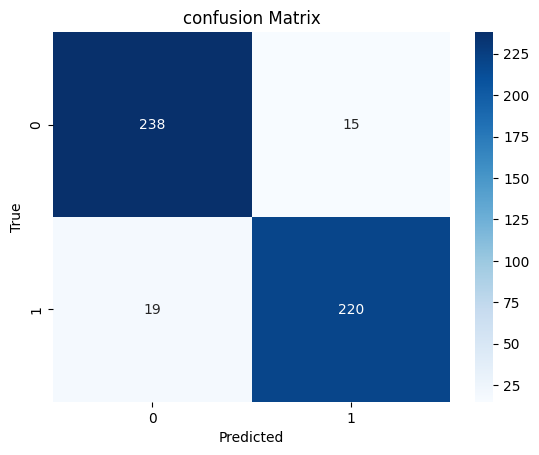

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=np.unique(y_test),yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('confusion Matrix')
plt.show()

2.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Log_reg=LogisticRegression()

In [ ]:
Log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred2=Log_reg.predict(X_test)

In [ ]:
accuracy_2=accuracy_score(y_test,y_pred2)

In [ ]:
print(accuracy_2)

0.6544715447154471


3.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC=DecisionTreeClassifier()

In [ ]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3=DTC.predict(X_test)

In [ ]:
accuracy_3=accuracy_score(y_test,y_pred3)

In [ ]:
print(accuracy_3)

0.806910569105691


4. Support Vector Machines

In [ ]:
from sklearn import svm

In [ ]:
svc=svm.SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred4=svc.predict(X_test)

In [ ]:
accuracy4=accuracy_score(y_test,y_pred4)

In [ ]:
print(accuracy4)

0.7276422764227642


Bar Chart for All 4 models and their Accuracy

In [ ]:
px.bar(x=['Random Forest','Logistic Regression','Decision tree','SVM'],y=[0.92,0.66,0.80,0.74])

In [ ]:
#Random forest is the best suited model for this problem statement.

Conclusion about the hypothesis.

1.True, work_phone, phone, email_id did not make much contribution to the model.

2.True, Family size was enough for model prediction which was proven while putting correlation between the columns.Family_size and Children were highly correlated.

3.True, RandomForest was good choice for this problem statement.

SQL- Questions

1.Group the customers based on their income type and find the average of their annual income.

2.Find the female owners of cars and property.

3.Find the male customers who are staying with their families.

4.Please list the top five people having the highest income.

5.How many married people are having bad credit?

6.What is the highest education level and what is the total count?

7.Between married males and females, who is having more bad credit?

ANSWERS

In [ ]:
import duckdb

In [ ]:
con= duckdb.connect()

Preparing df for SQL

In [ ]:
df_sql=copy.deepcopy(CC_merged)

In [ ]:
df_sql.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df_sql.GENDER.fillna(value='F',inplace=True)

In [ ]:
df_sql.Annual_income.mean()

191399.3262295082

In [ ]:
df_sql.Annual_income.fillna(value=191399.326,inplace=True)

In [ ]:
df_sql['Birthday_count']=df_sql['Birthday_count']*(-1)

In [ ]:
df_sql.Birthday_count.mean()

16040.342070773264

In [ ]:
df_sql.Birthday_count.fillna(value=16040.342,inplace=True)

In [ ]:
i=df_sql[df_sql.Type_Occupation.isnull()].index

In [ ]:
df_sql.loc[i,'Type_Occupation']=missing_predicted

In [ ]:
df_sql.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [ ]:
con.register('df_sql',df_sql)

In [ ]:
con.execute('select * from df_sql').fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.000,Pensioner,Higher education,Married,House / apartment,18772.000,365243,1,0,0,0,Drivers,2,1
1,5009744,F,Y,N,0,315000.000,Commercial associate,Higher education,Married,House / apartment,13557.000,-586,1,1,1,0,Accountants,2,1
2,5009746,F,Y,N,0,315000.000,Commercial associate,Higher education,Married,House / apartment,16040.342,-586,1,1,1,0,Accountants,2,1
3,5009749,F,Y,N,0,191399.326,Commercial associate,Higher education,Married,House / apartment,13557.000,-586,1,1,1,0,Accountants,2,1
4,5009752,F,Y,N,0,315000.000,Commercial associate,Higher education,Married,House / apartment,13557.000,-586,1,1,1,0,Accountants,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.326,Commercial associate,Higher education,Married,House / apartment,11957.000,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.000,Commercial associate,Incomplete higher,Single / not married,House / apartment,10229.000,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.000,Working,Higher education,Married,House / apartment,13174.000,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.000,Working,Secondary / secondary special,Civil marriage,House / apartment,15292.000,-645,1,1,1,0,Drivers,2,0


1.Group the customers based on their income type and find the average of their annual income.

In [ ]:
con.execute('select AVG(Annual_income) from df_sql groupby (Type_Income) ').fetchdf()

,avg(Annual_income)
0,191399.326226


2.Find the female owners of cars and property.

In [ ]:
con.execute("select * from df_sql where GENDER='F'AND Car_Owner='Y' AND Propert_Owner='Y'  ").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5018498,F,Y,Y,0,90000.000,Working,Secondary / secondary special,Married,House / apartment,18950.0,-1002,1,1,1,0,Cooking staff,2,1
1,5018501,F,Y,Y,0,191399.326,Working,Secondary / secondary special,Married,House / apartment,18950.0,-1002,1,1,1,0,Cooking staff,2,1
2,5018503,F,Y,Y,0,90000.000,Working,Secondary / secondary special,Married,House / apartment,18950.0,-1002,1,1,1,0,Cooking staff,2,1
3,5024213,F,Y,Y,0,540000.000,Commercial associate,Higher education,Married,House / apartment,15702.0,-185,1,0,1,0,Managers,2,1
4,5036660,F,Y,Y,0,76500.000,Pensioner,Secondary / secondary special,Married,House / apartment,23835.0,365243,1,0,0,0,Cooking staff,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,5048458,F,Y,Y,1,126000.000,Working,Higher education,Married,House / apartment,9441.0,-157,1,0,0,0,Core staff,3,0
175,5023719,F,Y,Y,0,175500.000,Pensioner,Higher education,Married,House / apartment,22077.0,365243,1,0,1,0,Managers,2,0
176,5033520,F,Y,Y,3,180000.000,Working,Secondary / secondary special,Married,Municipal apartment,12559.0,-5862,1,0,1,0,Medicine staff,5,0
177,5024049,F,Y,Y,1,144000.000,Working,Higher education,Married,House / apartment,12903.0,-2924,1,0,0,0,Accountants,3,0


3.Find the male customers who are staying with their families.

In [ ]:
con.execute("select * from df_sql where GENDER='M' AND Family_Members>=2").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,18772.0,365243,1,0,0,0,Drivers,2,1
1,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,18173.0,-678,1,0,1,1,Core staff,3,1
2,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,18173.0,-678,1,0,1,1,Core staff,3,1
3,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,8907.0,-913,1,0,0,1,Managers,3,1
4,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,16896.0,-248,1,0,0,0,Laborers,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,17975.0,-3476,1,0,0,0,Drivers,2,0
466,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,13336.0,-1436,1,0,0,0,Low-skill Laborers,2,0
467,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,11294.0,-3536,1,0,1,0,Drivers,3,0
468,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,13174.0,-2477,1,0,0,0,Managers,4,0


4.Please list the top five people having the highest income.

In [ ]:
con.execute('select * from df_sql order  by Annual_income desc limit 5').fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,10142.0,-2479,1,0,0,0,Managers,2,0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,10142.0,-2479,1,0,0,0,Managers,2,0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,15380.0,-4509,1,0,0,0,Laborers,3,0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,9889.0,-1000,1,0,0,0,Managers,4,0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,9889.0,-1000,1,0,0,0,Managers,4,0


5.How many married people are having bad credit?

In [ ]:
con.execute("select count(*) from df_sql where Marital_status='Married' or Marital_status='Civil marriage' and label=1 ").fetchdf()

,count_star()
0,1053


6.What is the highest education level and what is the total count?

In [ ]:
con.execute("select count(*) from df_sql where EDUCATION='Academic degree' ").fetchdf()

,count_star()
0,2


Highest education level is Academic degree.

7.Between married males and females, who is having more bad credit?

In [ ]:
con.execute("SELECT GENDER,count(*) FROM df_sql WHERE label=1 and Marital_status='Married' or Marital_status='Civil marriage' GROUP BY GENDER ").fetchdf()

,GENDER,count_star()
0,M,90
1,F,125


Married Females are having more bad credit.

THE END.